<a href="https://colab.research.google.com/github/swastikbanerjee/ML_Lab/blob/main/2348566_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns.fpgrowth import fpgrowth

In [5]:
data = pd.read_csv("/content/Market_Basket_Optimisation.csv")

In [6]:
data.shape

(7500, 20)

In [7]:
data.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
list_of_lists = [row.dropna().tolist() for index, row in data.iterrows()]
print(list_of_lists)

[['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'], ['low fat yogurt'], ['whole wheat pasta', 'french fries'], ['soup', 'light cream', 'shallot'], ['frozen vegetables', 'spaghetti', 'green tea'], ['french fries'], ['eggs', 'pet food'], ['cookies'], ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'], ['spaghetti', 'champagne', 'cookies'], ['mineral water', 'salmon'], ['mineral water'], ['shrimp', 'chocolate', 'chicken', 'honey', 'oil', 'cooking oil', 'low fat yogurt'], ['turkey', 'eggs'], ['turkey', 'fresh tuna', 'tomatoes', 'spaghetti', 'mineral water', 'black tea', 'salmon', 'eggs', 'chicken', 'extra dark chocolate'], ['meatballs', 'milk', 'honey', 'french fries', 'protein bar'], ['red wine', 'shrimp', 'pasta', 'pepper', 'eggs', 'chocolate', 'shampoo'], ['rice', 'sparkling water'], ['spaghetti', 'mineral water', 'ham', 'body spray', 'pancakes', 'green tea'], ['burgers', 'grated chee

<Axes: >

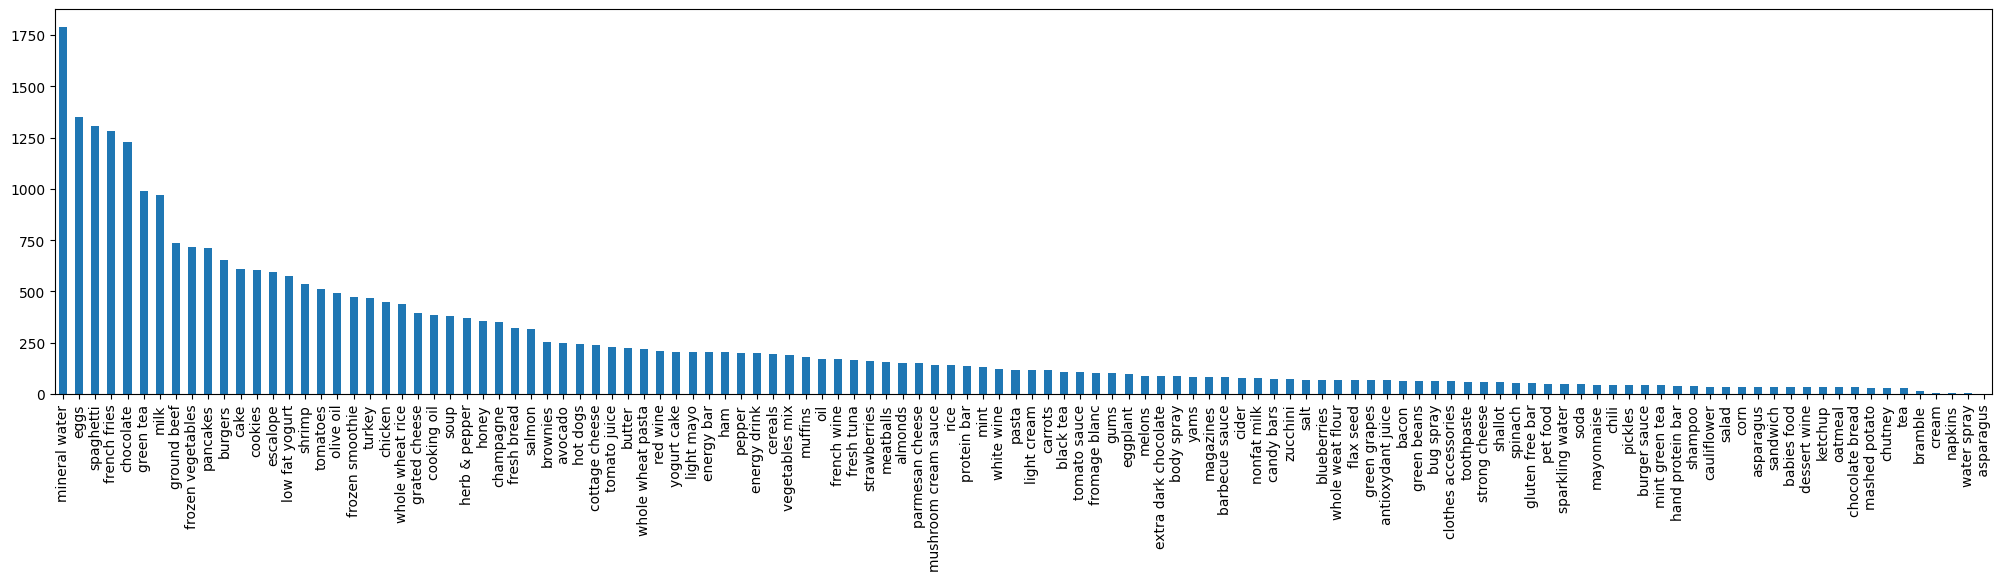

In [14]:
flattened_list = [x for i in list_of_lists for x in i]
pd.Series(flattened_list).value_counts().plot(kind='bar', figsize=(25,5))

In [15]:
print(flattened_list)

['burgers', 'meatballs', 'eggs', 'chutney', 'turkey', 'avocado', 'mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea', 'low fat yogurt', 'whole wheat pasta', 'french fries', 'soup', 'light cream', 'shallot', 'frozen vegetables', 'spaghetti', 'green tea', 'french fries', 'eggs', 'pet food', 'cookies', 'turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil', 'spaghetti', 'champagne', 'cookies', 'mineral water', 'salmon', 'mineral water', 'shrimp', 'chocolate', 'chicken', 'honey', 'oil', 'cooking oil', 'low fat yogurt', 'turkey', 'eggs', 'turkey', 'fresh tuna', 'tomatoes', 'spaghetti', 'mineral water', 'black tea', 'salmon', 'eggs', 'chicken', 'extra dark chocolate', 'meatballs', 'milk', 'honey', 'french fries', 'protein bar', 'red wine', 'shrimp', 'pasta', 'pepper', 'eggs', 'chocolate', 'shampoo', 'rice', 'sparkling water', 'spaghetti', 'mineral water', 'ham', 'body spray', 'pancakes', 'green tea', 'burgers', 'grated cheese', 'shrimp', 'pasta', 'avocado', 'honey', '

In [16]:
items = list(set(x for y in list_of_lists for x in y))
df = pd.DataFrame(0, index=range(7500), columns = items)
df

,cookies,french wine,chili,olive oil,cereals,french fries,babies food,eggs,strong cheese,burgers,...,tomatoes,napkins,muffins,yogurt cake,almonds,eggplant,cream,pickles,zucchini,pasta
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
c = -1
for x in list_of_lists:
  c+=1
  for y in x:
      df.at[c,y] = 1
df

,cookies,french wine,chili,olive oil,cereals,french fries,babies food,eggs,strong cheese,burgers,...,tomatoes,napkins,muffins,yogurt cake,almonds,eggplant,cream,pickles,zucchini,pasta
0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7496,0,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
frequent_itemset = apriori(df,min_support=0.01,use_colnames=True)
frequent_itemset

,support,itemsets
0,0.080400,(cookies)
1,0.022533,(french wine)
2,0.065733,(olive oil)
3,0.025733,(cereals)
4,0.170933,(french fries)
...,...,...
254,0.015867,"(spaghetti, chocolate, mineral water)"
255,0.017067,"(spaghetti, ground beef, mineral water)"
256,0.011467,"(spaghetti, mineral water, pancakes)"
257,0.012000,"(spaghetti, mineral water, frozen vegetables)"


In [21]:
ar = association_rules(frequent_itemset,metric='lift',min_threshold=1) #A lift value greater than 1 indicates a positive association between the items.
filtered_ar = ar [(ar['confidence']>0.4)] #minimum confidence value is 40%
filtered_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
13,(olive oil),(mineral water),0.065733,0.238267,0.027467,0.417850,1.753707,0.011805,1.308483,0.460018
224,(soup),(mineral water),0.050533,0.238267,0.023067,0.456464,1.915771,0.011026,1.401441,0.503458
276,(ground beef),(mineral water),0.098267,0.238267,0.040933,0.416554,1.748266,0.017520,1.305576,0.474647
309,"(spaghetti, olive oil)",(mineral water),0.022933,0.238267,0.010267,0.447674,1.878880,0.004802,1.379138,0.478747
319,"(milk, eggs)",(mineral water),0.030800,0.238267,0.013067,0.424242,1.780536,0.005728,1.323011,0.452302
337,"(chocolate, eggs)",(mineral water),0.033200,0.238267,0.013467,0.405622,1.702389,0.005556,1.281565,0.426758
343,"(ground beef, eggs)",(mineral water),0.020000,0.238267,0.010133,0.506667,2.126469,0.005368,1.544054,0.540548
354,"(spaghetti, milk)",(mineral water),0.035467,0.238267,0.015733,0.443609,1.861817,0.007283,1.369061,0.479911
361,"(milk, chocolate)",(mineral water),0.032133,0.238267,0.014000,0.435685,1.828559,0.006344,1.349836,0.468165
366,"(ground beef, milk)",(mineral water),0.022000,0.238267,0.011067,0.503030,2.111207,0.005825,1.532756,0.538177


In [22]:
freq_itemset = fpgrowth(df, min_support=0.01, use_colnames=True)
sorted_freq_itemset = freq_itemset.sort_values(by='support', ascending=False)
print(sorted_freq_itemset)

      support                                  itemsets
5    0.238267                           (mineral water)
0    0.179733                                    (eggs)
15   0.174133                               (spaghetti)
11   0.170933                            (french fries)
21   0.163867                               (chocolate)
..        ...                                       ...
130  0.010133                         (soup, chocolate)
126  0.010133  (spaghetti, french fries, mineral water)
122  0.010133       (low fat yogurt, frozen vegetables)
230  0.010000      (frozen smoothie, frozen vegetables)
171  0.010000                    (shrimp, french fries)

[259 rows x 2 columns]


In [23]:
best_choices=ar.sort_values(by='lift',ascending=False)
print('Best Choices are...')
print(best_choices[['antecedents','consequents','lift']])

Best Choices are...
                    antecedents                 consequents      lift
145             (herb & pepper)               (ground beef)  3.291555
144               (ground beef)             (herb & pepper)  3.291555
385  (spaghetti, mineral water)               (ground beef)  2.907540
388               (ground beef)  (spaghetti, mineral water)  2.907540
313                 (olive oil)  (spaghetti, mineral water)  2.614731
..                          ...                         ...       ...
43               (french fries)            (low fat yogurt)  1.020983
3                   (olive oil)                      (eggs)  1.015704
2                        (eggs)                 (olive oil)  1.015704
192                 (spaghetti)                  (escalope)  1.013422
193                  (escalope)                 (spaghetti)  1.013422

[408 rows x 3 columns]


In [24]:
best_choices=ar.sort_values(by='lift',ascending=False)
print('Best Choices are...')
print(best_choices[['antecedents','consequents','lift']])

Best Choices are...
                    antecedents                 consequents      lift
145             (herb & pepper)               (ground beef)  3.291555
144               (ground beef)             (herb & pepper)  3.291555
385  (spaghetti, mineral water)               (ground beef)  2.907540
388               (ground beef)  (spaghetti, mineral water)  2.907540
313                 (olive oil)  (spaghetti, mineral water)  2.614731
..                          ...                         ...       ...
43               (french fries)            (low fat yogurt)  1.020983
3                   (olive oil)                      (eggs)  1.015704
2                        (eggs)                 (olive oil)  1.015704
192                 (spaghetti)                  (escalope)  1.013422
193                  (escalope)                 (spaghetti)  1.013422

[408 rows x 3 columns]
